<a href="https://colab.research.google.com/github/BLayus/Statistics/blob/main/DA_Brainnest_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

!pip install pyreadstat

import pyreadstat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro
import scipy.stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Open the dataset on google drive mount

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_spss('/content/drive/MyDrive/DA Brainest/Week 1/Datasets/Birthweight_reduced_kg_SPSS.sav')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a first look at the dataset

display(df.head(5))
display(df.tail(5))

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,Non-smoker,162.0,57.0,23.0,10.0,35.0,179.0,Not low birthweight,Aged < 35,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,Non-smoker,171.0,62.0,19.0,12.0,0.0,183.0,Not low birthweight,Aged < 35,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,Non-smoker,172.0,58.0,31.0,16.0,25.0,185.0,Not low birthweight,Aged 35+,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,Non-smoker,174.0,68.0,26.0,14.0,25.0,189.0,Not low birthweight,Aged < 35,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,Non-smoker,175.0,66.0,30.0,12.0,0.0,184.0,Not low birthweight,Aged < 35,0.0


,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
37,619.0,33.0,52.0,3.41,39.0,23.0,Smoker,181.0,69.0,23.0,16.0,2.0,181.0,Not low birthweight,Aged < 35,25.0
38,1369.0,34.0,49.0,3.18,38.0,31.0,Smoker,162.0,57.0,32.0,16.0,50.0,194.0,Not low birthweight,Aged < 35,25.0
39,1262.0,34.0,53.0,3.19,41.0,27.0,Smoker,163.0,51.0,31.0,16.0,25.0,185.0,Not low birthweight,Aged < 35,35.0
40,516.0,33.0,47.0,2.66,35.0,20.0,Smoker,170.0,57.0,23.0,12.0,50.0,186.0,Low birthweight,Aged < 35,35.0
41,1272.0,32.0,53.0,2.75,40.0,37.0,Smoker,168.0,61.0,31.0,16.0,0.0,173.0,Not low birthweight,Aged 35+,50.0


In [ ]:
df.columns

Index(['ID', 'Headcirc', 'Length', 'Birthweight', 'Gestation', 'mage',
       'smoker', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight',
       'lowbwt', 'mage35', 'mnocig'],
      dtype='object')

### Q1. What is the mean father’s age?

In [ ]:
df['fage'].mean().round(3)

28.905

### Q2. What is the mean father’s age for low birthweight babies?

In [ ]:
df[df['lowbwt'] == 'Low birthweight']['fage'].mean().round(3)

24.833

### Q3. Is the father's age normally distributed? Justify your answer.

In [ ]:
# Finding mean and std of father's age

fage_mean = df['fage'].mean()
fage_std = df['fage'].std()

print(f'The mean is: {fage_mean}, and the standard deviation is: {fage_std}')

# Using Shapiro-Wilk test, if P value is greater than 0.05, then the data is normally distributed, whatever not...
# H0 > p -> Null hypothesis: the distribution is normally distributed
# Ha < p -> Alt hypothesis: the distribution is not normally distributed

fage_data = df['fage']
shapiro(fage_data)

# Since the P-value is 0.03, wich is less than the threshold (0.05), then we reject the null hypothesis
# We do not have sufficient evidence to say that the sample comes from a normal distribution

# So, the data is NON-normally distributed


The mean is: 28.904761904761905, and the standard deviation is: 6.863866235440893


ShapiroResult(statistic=0.9436862468719482, pvalue=0.03849918395280838)

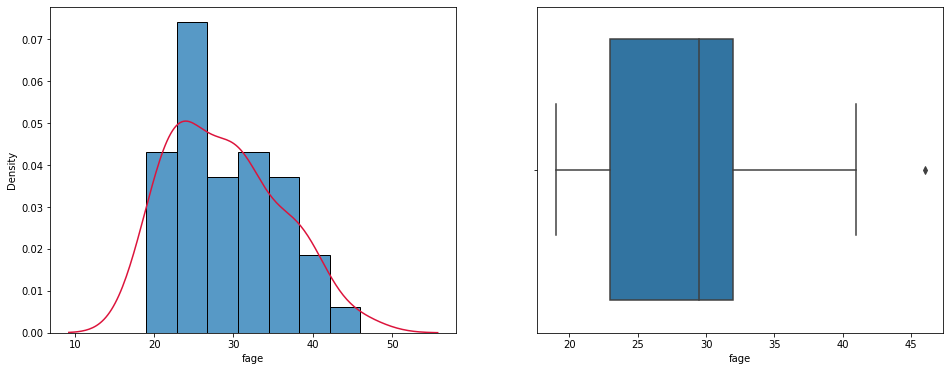

In [ ]:
# Ploting the charts

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.histplot(df['fage'], kde= False, stat= 'density', ax= ax[0])
sns.kdeplot(df['fage'], ax= ax[0], color= 'crimson')
sns.boxplot(data= df, x= 'fage', ax= ax[1])
plt.show()

### Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?

In [ ]:
# Using log transformation  with numpy

data = df['fage']

LOG_fage = np.log(data)

#print(data, LOG_fage)
print(f'The mean score of the transformed variable is: {LOG_fage.mean().round(3)}')

The mean score of the transformed variable is: 3.337


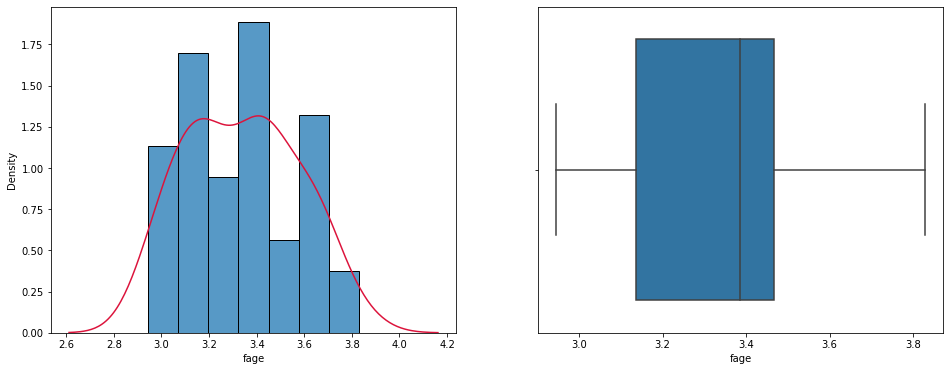

In [ ]:
# Ploting log_fage after transformation

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.histplot(LOG_fage, kde= False, stat= 'density', ax= ax[0])
sns.kdeplot(LOG_fage, ax= ax[0], color= 'crimson')
sns.boxplot(x= LOG_fage, ax= ax[1])
plt.show()

### Q5. Is the above mean score a good representation of the real value? Justify your answer.

In [ ]:
# Yes, because all data points were applied with the same function, so the resulting set is proportional to original numbers

### Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.

In [ ]:
# finding mean and std of LOG father's age

LOG_fage_mean = LOG_fage.mean()
LOG_fage_std = LOG_fage.std()

print(f'The mean is: {LOG_fage_mean} and the standard deviation is: {LOG_fage_std}')

# Using Shapiro-Wilk test, if P value is greater than 0.05, then the data is normally distributed, whatever not...
# H0 > p -> Null hypothesis: the distribution is normally distributed
# Ha < p -> Alt hypothesis: the distribution is not normal

LOG_fage_data = LOG_fage
shapiro(LOG_fage_data)

# Since we applied a function to normalize the distribuction, the new set is expected to be normally distributed

# Since the P-value is 0.12, wich is more than the threshold (0.05), then we fail to reject the null hypothesis
# We have sufficient evidence to say that the sample comes from a normal distribution
# So, the data is normally distributed

The mean is: 3.3370421189026085 and the standard deviation is: 0.2343594308066866


ShapiroResult(statistic=0.9583315253257751, pvalue=0.12867699563503265)

### Q7. Is the variable “years father was in education” normally distributed?

In [ ]:
# finding mean and std of father's years of education

feduc_mean = df['fedyrs'].mean()
feduc_std = df['fedyrs'].std()

print(f'The mean is: {feduc_mean}, and the standard deviation is: {feduc_std}')

# Using Shapiro-Wilk test, if P value is greater than 0.05, then the data is normally distributed, whatever not...
# H0 > p -> Null hypothesis: the distribution is normally distributed
# Ha < p -> Alt hypothesis: the distribution is not normal

feduc_data = df['fedyrs']
shapiro(feduc_data)

# Since the P-value is 0.0000448, wich is less than the threshold (0.05), then have to reject the null hypothesis
# We do not have sufficient evidence to say that the sample comes from a normal distribution
# So, the data is non-normal distributed

The mean is: 13.666666666666666, and the standard deviation is: 2.160246899469287


ShapiroResult(statistic=0.8441449403762817, pvalue=4.483600059757009e-05)

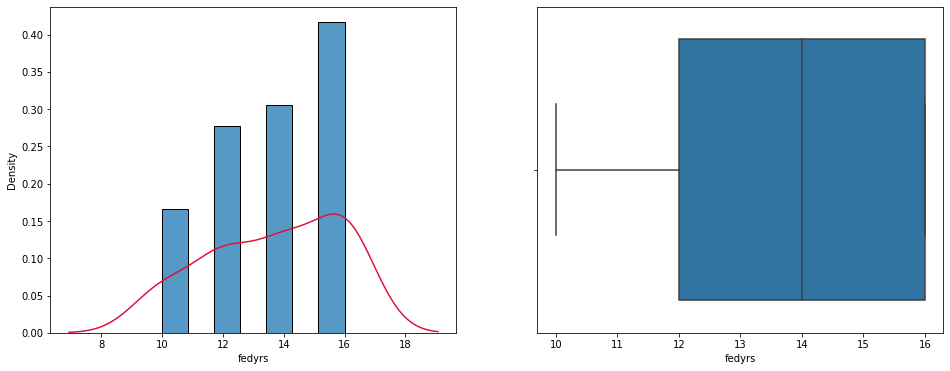

In [ ]:
# Ploting feduc distribution charts

fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.histplot(feduc_data, kde= False, stat= 'density', ax= ax[0])
sns.kdeplot(feduc_data, ax= ax[0], color= 'crimson')
sns.boxplot(x= feduc_data, ax= ax[1])
plt.show()


### Q8. Mentioning the null and alternative hypotheses, explain the above answer.

In [ ]:
# The null hypothesis is that the data is normally distributed
# The alternative hypothesis is that the data is non-normally distributed

# As the p-value of the shapiro-wilk test is much minor than the threshold, we have sufficient evidences to reject the null hypothesis
# So we grab the alternative hypothesis, wich means that this dataset is non-normally distributed

### Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?

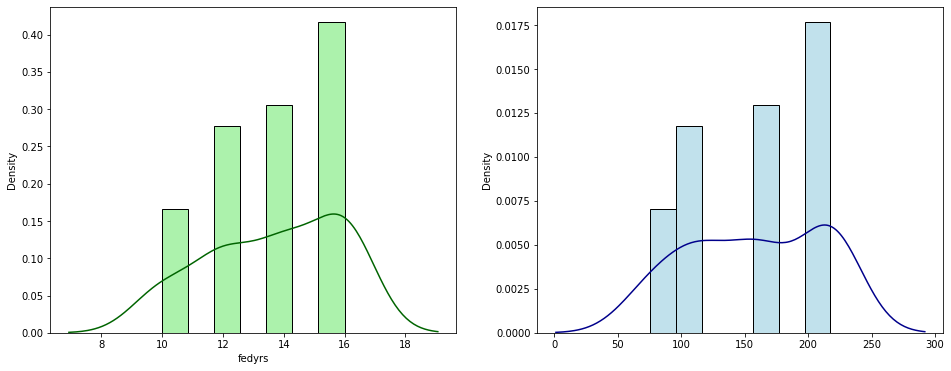

Lambda value used for Transformation: 2.2314161300163327


In [ ]:
# Determine the data
feduc_orig_data = df['fedyrs']

# Transform data and save lambda value
fitted_data, fitted_lambda = stats.boxcox(feduc_orig_data)

# Creating axes to compare the original and transformed data displots

fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.histplot(feduc_orig_data, kde= False, stat= 'density', ax= ax[0], color= 'lightgreen')
sns.kdeplot(feduc_orig_data, ax= ax[0], color= 'darkgreen')

sns.histplot(fitted_data, kde= False, stat= 'density', ax= ax[1], color= 'lightblue')
sns.kdeplot(fitted_data, ax= ax[1], color= 'darkblue')

plt.show()

#sns.distplot(feduc_orig_data, kde= True, kde_kws = {'shade': True, 'linewidth': 2}, label= 'Non-Normal', color= 'green', ax= ax[0])

#sns.distplot(fitted_data, kde= True, kde_kws = {'shade': True, 'linewidth': 2}, label= 'Normal', color= 'lightblue', ax= ax[1])

print(f"Lambda value used for Transformation: {fitted_lambda}")

### Q10. Is this new variable normally distributed? Explain.

In [ ]:
# Box-Cox transformation does not guarantee that the data will be normal distributed after transformation
# We must check again with Shapiro-Will test

# finding mean and std of father's years of education

feduc_BC_mean = fitted_data.mean()
feduc_BC_std = fitted_data.std()

print(f'The mean is: {feduc_BC_mean}, and the standard deviation is: {feduc_BC_std}')

# Using Shapiro-Wilk test, if P value is greater than 0.05, then the data is normally distributed, whatever not...
# H0 > p -> Null hypothesis: the distribution is normally distributed
# Ha < p -> Alt hypothesis: the distribution is not normal

feduc_BC_data = fitted_data
shapiro_test = shapiro(feduc_BC_data)
display(shapiro_test)
round(shapiro_test.pvalue, 6)

# Since the P-value is 4.2e-05 (0.000042), wich is less than the threshold (0.05), then we have to reject the null hypothesis
# We do not have sufficient evidence to say that the sample comes from a normal distribution
# So, the data is NON-normal distributed


The mean is: 157.96716280846272, and the standard deviation is: 51.81774126656102


ShapiroResult(statistic=0.8429067730903625, pvalue=4.183058990747668e-05)

4.2e-05

### Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?

In [ ]:
df['BC_fyears'] = fitted_data

df[df['mage35'] == 'Aged < 35']['BC_fyears'].mean()


153.1804464073593

### Q12. Which test would you use to investigate the relationship between birth weight and father's age?
  * Pearson product-moment correlation
  * Spearman’s Rank order correlation
  * Point-Biserial correlation
  * Phi-Coefficient


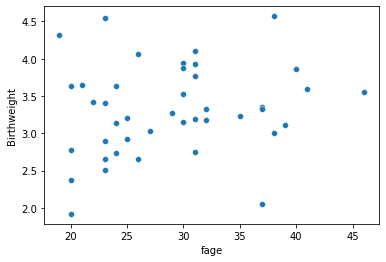

In [ ]:
sns.scatterplot(data=df, x= 'fage', y= 'Birthweight')

In [ ]:
# Calculating pearson's correlation with scipy stats

P_corr = stats.pearsonr(x= df['Birthweight'], y= df['fage'])
print(P_corr)

# Calculating Spearman's correlation, this calculation is better used for non normal data

S_corr = stats.spearmanr(df['Birthweight'], df['fage'])
print(S_corr)

(0.17570999332980186, 0.2656859138375593)
SpearmanrResult(correlation=0.17810631240688332, pvalue=0.25911799368781196)


### Q13. Justify the above choice in terms of the distribution of data and the nature of the test

In [ ]:
# Both variables are continuous
# Father's age distribution is Non-Normal and Birth Weight's distribution is Normal
# There's no evident pattern of a linear relationship in the scatter plot chart, even thought there is a monotonic relationship (one value increases as the other increases too)
# As the distribution of one of the variables are non normal, we would better use the Spearman correlation
# But there is no big difference between Pearson's and Spearman's correlation values...

### Q14. What is the direction of that relationship?

In [ ]:
# Positive direction, as no values are negatives

### Q15. What is the form of that relationship?

In [ ]:
# Non Linear relationship

### Q16. What is the degree of that relationship?

In [ ]:
# Negligible correlation, as the r value (0.26) is less than 0.3

### Q17. What test would you use to investigate the relationship between smoking and birth weight?

  * Pearson product-moment correlation
  * Spearman’s Rank order correlation
  * Point-Biserial correlation
  * Phi-Coefficient


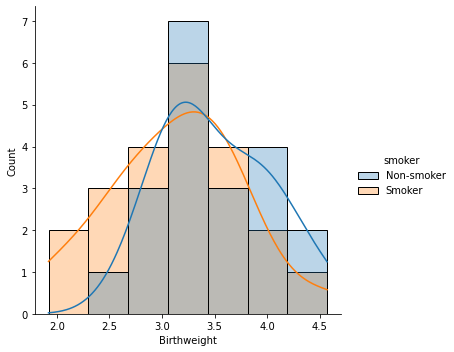

In [ ]:
# Plot a distribution plot chart with smoking X non smoking mothers data

sns.displot(data=df, x= 'Birthweight', hue= 'smoker', kde= True, alpha= 0.3)

In [ ]:
# Create another column with 0 and 1 values for smokers and non smokers
# 0 will be NON-Smokers, 1 will be Smokers

df['Smoker_Dummy'] = df['smoker']
df['Smoker_Dummy'].replace(['Non-smoker', 'Smoker'], [0, 1], inplace= True)


In [ ]:
# finding mean and std of Smoker_Dummy and non-Smoker_Dummy groups

non_smokers_mean = df[df['Smoker_Dummy'] == 0]['Birthweight'].mean()
non_smokers_std = df[df['Smoker_Dummy'] == 0]['Birthweight'].std()

print(f'The mean is: {non_smokers_mean}, and the standard deviation is: {non_smokers_std}')

smokers_mean = df[df['Smoker_Dummy'] == 1]['Birthweight'].mean()
smokers_std = df[df['Smoker_Dummy'] == 1]['Birthweight'].std()

print(f'The mean is: {smokers_mean}, and the standard deviation is: {smokers_std}')

# Using Shapiro-Wilk test, if P value is greater than 0.05, then the data is normally distributed, whatever not...
# H0 > p -> Null hypothesis: the distribution is normally distributed
# Ha < p -> Alt hypothesis: the distribution is not normal

non_smokers_data = df[df['Smoker_Dummy'] == 0]['Birthweight']
smokers_data = df[df['Smoker_Dummy'] == 1]['Birthweight']

display(shapiro(non_smokers_data))
display(shapiro(smokers_data))

# Since the P-value is 0.6 and 0.9, wich is both more than the threshold (0.05), then we fail to reject the null hypothesis
# We have sufficient evidence to say that the samples comes from a normal distribution
# So, the data is normally distributed

The mean is: 3.5095000000000005, and the standard deviation is: 0.5184945312608112
The mean is: 3.1340909090909093, and the standard deviation is: 0.631247133635428


ShapiroResult(statistic=0.9672559499740601, pvalue=0.6962055563926697)

ShapiroResult(statistic=0.9824167490005493, pvalue=0.9494719505310059)

In [ ]:
# Calculating point-biserial correlation (a specific kind of pearson's correlation), since we have one binary (dichotomus) variable and the other is continuous

PBS_corr = stats.pointbiserialr(df['Birthweight'], df['Smoker_Dummy'])
print(PBS_corr)

PointbiserialrResult(correlation=-0.31423394642987135, pvalue=0.04269624654559379)


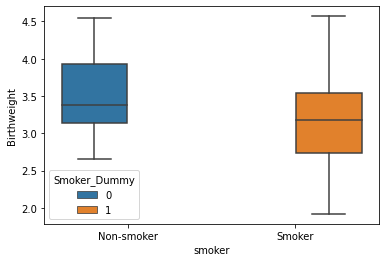

In [ ]:
# A better way to visualize this kind of relationship is using a boxplot chart

sns.boxplot(data= df, x= 'smoker', y= 'Birthweight', hue= 'Smoker_Dummy')

### Q18. Report on the above results including information about direction/form/degree of the relationship.

In [ ]:
# These two variables (birth weight for smokers and non-smokers) are normally distributed
# As the value of x goes from 0 to 1, there is a decrease in the birthweight
# The r value is negative -0.31
# The p value is 0.042, that is less than the threshold (0.05)
# There is an evidence of a statistically significant bivariate association between the two  variables

# It is a negative direction, linear form and the degree is weak or low negative

### Q19. If you wanted to see the effect of the length of a baby on birthweight, what would your independent variable be?
  * Length of baby
  * Birthweight


In [ ]:
# Birth weight of baby, as changes in the dependent variable length may cause the first to change


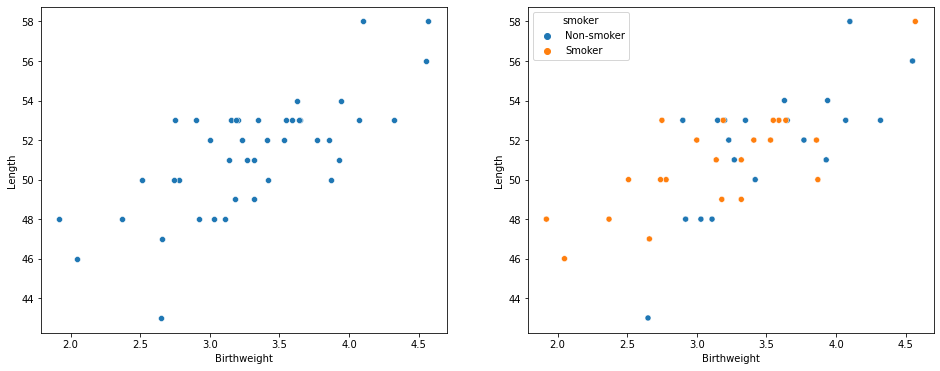

In [ ]:
# scatterplot of these two variables

fig, ax= plt.subplots(1, 2, figsize= (16,6))
sns.scatterplot(data= df, x= 'Birthweight', y= 'Length', ax=ax[0])
sns.scatterplot(data= df, x= 'Birthweight', y= 'Length', hue= 'smoker', ax=ax[1])
plt.show()


### Q20. In statistics, when creating a scatterplot, it is a common practice to put the independent variable on the x-axis and the dependent variable on the y-axis. With this in mind, create a scatterplot for the above case and provide the regression line. For homework submitted using MS Word, insert a picture of the scatterplot.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(data= df, x= 'Length', y= 'Birthweight', ci= None, ax= ax, line_kws={'color': 'orange', 'lw': 2})

NameError: ignored

### Q21. Is the relationship between the length of baby and birthweight linear?
  * Yes
  * No


In [ ]:
# Testing normality of the variables

# Finding mean and std of the variable
BW_mean = df['Birthweight'].mean()
BW_std =  df['Birthweight'].std()

print(f'The mean is: {BW_mean}, and the standard deviation is: {BW_std}')

# Using Shapiro-Wilk test
# H0 Null hypothesis = the distribution is not normally distributed = p < 0.05
# H1 Alternative hypothesis = the distribution is normally distributed = p > 0.05

BW_data = df['Birthweight']
shapiro(BW_data)

# Since the P-value is 0.96, wich is much more than the threshold (0.05), then we fail to reject the null hypothesis
# We have sufficient evidence to say that the sample comes from a normal distribution
# So, the data is normal distributed



The mean is: 3.312857142857143, and the standard deviation is: 0.603895022836148


ShapiroResult(statistic=0.9899008274078369, pvalue=0.9684654474258423)

In [ ]:
# Testing normality of the variables

# Finding mean and std of the variable

L_mean = df['Length'].mean()
L_std =  df['Length'].std()

print(f'The mean is: {L_mean}, and the standard deviation is: {L_std}')

# Using Shapiro-Wilk test
# H0 Null hypothesis = the distribution is not normally distributed = p < 0.05
# H1 Alternative hypothesis = the distribution is normally distributed = p > 0.05

L_data = df['Length']
shapiro(L_data)

# Since the P-value is 0.053, wich is more than the threshold (0.05), then we fail to reject the null hypothesis
# We have sufficient evidence to say that the sample comes from a normal distribution
# So, the data is normal distributed


The mean is: 51.333333333333336, and the standard deviation is: 2.935623643940379


ShapiroResult(statistic=0.9477477073669434, pvalue=0.053657326847314835)

In [ ]:
# Calculating pearson's correlation with scipy stats

P_corr = stats.pearsonr(x= df['Birthweight'], y= df['Length'])
print(P_corr)

# Calculating Spearman's correlation

S_corr = stats.spearmanr(df['Birthweight'], df['Length'])
print(S_corr)

(0.7268334847885259, 5.0293461366560215e-08)
SpearmanrResult(correlation=0.6837518802429358, pvalue=6.002297313933904e-07)


### Q22. Justify the above choice.

In [ ]:
# Null hypothesis is that there is no statistical significative linear correlation between birth weight and length
# Alternative hypothesis is that there is a linear correlation

# There is sufficient evidence to reject the null hypothesis, since the p-value 0.000006 is less than the threshold (0.05)
# So the relationship between lenght and birthweight is linear


### Q23. Is there any evidence to suggest that the birth weight, length of baby, and head circumference are related?
  * Yes
  * No


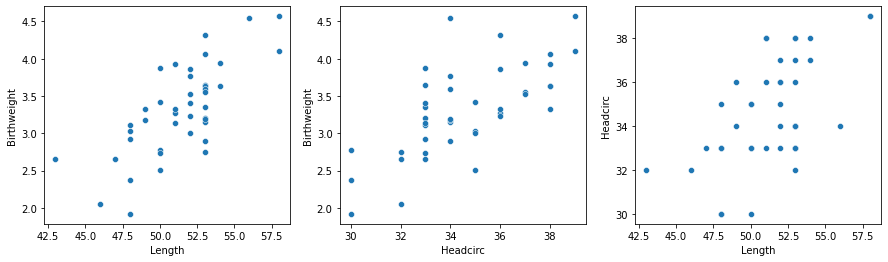

In [ ]:
# Scatterplot beetwenn the variables

fig, ax = plt.subplots(1,3, figsize=(15, 4))

sns.scatterplot(data= df, x= 'Length', y= 'Birthweight', ax= ax[0])

sns.scatterplot(data= df, x= 'Headcirc', y= 'Birthweight', ax= ax[1])

sns.scatterplot(data= df, x= 'Length', y= 'Headcirc', ax= ax[2])

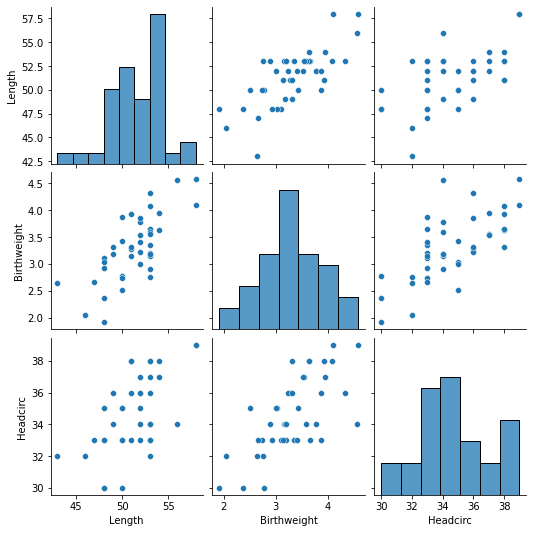

In [ ]:
# Pairplot

data = df[['Length', 'Birthweight', 'Headcirc']]

sns.pairplot(data)

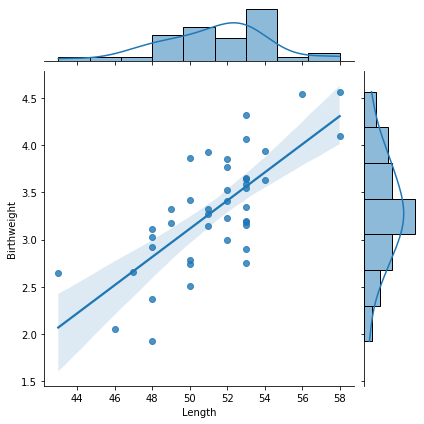

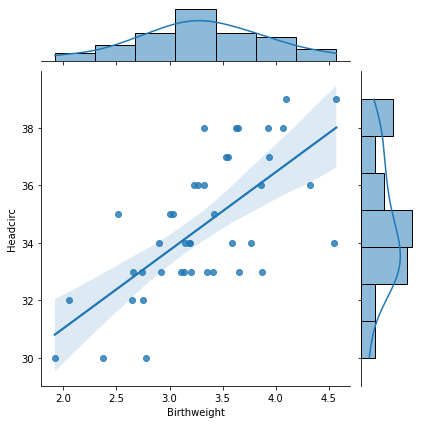

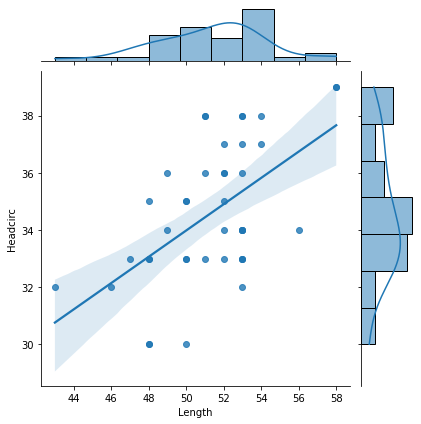

In [ ]:
sns.jointplot(data= data, x= 'Length', y= 'Birthweight', kind= 'reg')

sns.jointplot(data= data, x= 'Birthweight', y= 'Headcirc', kind= 'reg')

sns.jointplot(data= data, x= 'Length', y= 'Headcirc', kind= 'reg')


In [ ]:
# Finding mean and std of the variable head circumference, testing if it comes from normal distribution

HC_mean = data['Headcirc'].mean()
HC_std =  data['Headcirc'].std()

print(f'The mean is: {HC_mean}, and the standard deviation is: {HC_std}')

# Using Shapiro-Wilk test
# H0 Null hypothesis = the distribution is not normally distributed = p < 0.05
# H1 Alternative hypothesis = the distribution is normally distributed = p > 0.05

HC_data = data['Headcirc']
shapiro(HC_data)

# Since the P-value is 0.06, wich is more than the threshold (0.05), then we fail to reject the null hypothesis
# We have sufficient evidence to say that the sample comes from a normal distribution
# So, the data is normal distributed

The mean is: 34.595238095238095, and the standard deviation is: 2.3997918996113365


ShapiroResult(statistic=0.9504274129867554, pvalue=0.06690217554569244)

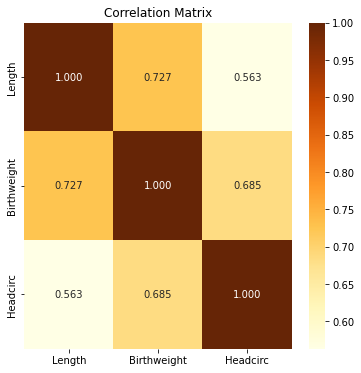

In [ ]:
# All the variables are normally distributed
# There is a correlation between birght weight and length, lets check if there is the same kind of correlation between head circumference and length / birth weight

# Correlation between these three variables with a heatmap

plt.figure(figsize=(6, 6))
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='YlOrBr')
plt.show()

# There is a positive correlation between all these three variables, although the head circumference X length correlation is weaker than the others


### Q24. Justify the above choice.

In [ ]:
# Lets test signifficance of the two remaining combinations

# Baby length X head circumference
# Birth weight X head circumference

# T-TEST
print(stats.ttest_ind( df['Headcirc'], df['Birthweight']))

# T-TEST
print(stats.ttest_ind( df['Headcirc'], df['Length']))

# Null hypothesis is that there is no statistical signifficative linear correlation between birth weight and length
# Alternative hypothesis is that there is a linear correlation

# There is sufficient evidence to reject the null hypothesis, since the p-value 0.000002 is less than the threshold (0.05)
# So the relationship between lenght and head circumference and between birth weight and head circumference is both linear

Ttest_indResult(statistic=81.92526112328086, pvalue=1.9777115396511035e-80)
Ttest_indResult(statistic=-28.608708000290655, pvalue=1.9828449306938893e-44)


### Q25. Describe the above relationship in your own words and provide evidence for your claims.  


In [ ]:
# There is a strong linear correlation (0.73) between baby's length and birth weight, with significative statistical evidence (pvalue minor than 0.05)
# When the length increases, the birth weight also increases, in a monotonic relationship

# There is also a strong correlation (0.68) between birth weight and head circumference, as the head circumference increases when the birth weight also increases
# There is a significant statistical evidence that this correlation is valid with a p-value minor than 0.05

# The relationship between head circumference and length is weaker than the others, but still relevant (0.56) and there is also a pvalue minor than the threshold

# So, it's possible to deduce that there is a relationship between all these three features, all of them are monotnic
# with positive correlation and with an acceptable level of significance